In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from numpy import mean
from numpy import std
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Input
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "C:/Users/procns/Desktop/인공지능/HAR/PAMAP/pamap_features.csv"

In [3]:
data = pd.read_csv(path)

In [4]:
data.tail(20)

,Unnamed: 0,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
2872513,2872513,100.04,0,NaN,25.1875,-5.97116,10.31530,5.45803,-6.31023,10.94120,...,-0.014096,0.020457,-46.4094,4.60708,-0.036811,0.601524,0.032146,0.797127,-0.041529,9
2872514,2872514,100.05,0,NaN,25.1875,-5.71919,9.85565,5.19395,-6.12103,10.32050,...,-0.003902,0.030101,-46.4196,4.86382,-0.462641,0.601458,0.032840,0.797176,-0.040999,9
2872515,2872515,100.06,0,NaN,25.1875,-5.76794,9.43660,4.96371,-5.88699,9.85028,...,-0.001511,0.025337,-45.8989,4.45204,-0.318499,0.601466,0.033180,0.797196,-0.040210,9
2872516,2872516,100.07,0,NaN,25.1875,-5.50261,9.35901,5.00643,-5.81480,9.51747,...,-0.012132,-0.003201,-46.7942,4.62585,-0.180018,0.601422,0.033572,0.797256,-0.039340,9
2872517,2872517,100.08,0,NaN,25.1875,-5.46402,9.47254,5.00662,-5.69551,9.38067,...,-0.057654,-0.001262,-46.4196,4.86382,-0.462641,0.601134,0.034147,0.797472,-0.038859,9
2872518,2872518,100.09,0,NaN,25.1875,-5.34317,9.58716,5.20049,-5.49832,9.51519,...,-0.024265,-0.057659,-45.7719,4.70445,0.107151,0.601000,0.034345,0.797592,-0.038292,9
2872519,2872519,100.10,0,NaN,25.1875,-5.25849,9.55098,5.47129,-5.34509,9.63507,...,-0.073070,-0.045499,-45.7817,5.09075,-0.035164,0.600630,0.034964,0.797857,-0.038004,9
2872520,2872520,100.11,0,NaN,25.1875,-4.99450,9.66242,5.43638,-5.25202,9.72522,...,-0.081548,-0.101350,-45.9160,5.48411,0.105740,0.600238,0.035604,0.798126,-0.037979,9
2872521,2872521,100.12,0,NaN,25.1875,-5.12204,9.16740,5.12824,-5.19339,9.54356,...,-0.105825,-0.091276,-46.4234,5.12192,-0.321122,0.599801,0.035837,0.798462,-0.037584,9
2872522,2872522,100.13,0,161.0,25.1875,-4.98611,8.70795,4.78544,-5.18338,9.13554,...,-0.099871,-0.122716,-45.6598,5.21258,-0.318540,0.599363,0.036095,0.798798,-0.037196,9


In [4]:
activity_id = {0: 'transient', 1:'lying', 2:'sitting', 3:'standing',
              4:'walking', 5:'running', 6:'cycling', 7:'Nordic walking',
              9:'watching TV', 10:'computer work', 11:'car driving',
              12:'ascending stairs', 13:'descending stairs', 16:'vacuum cleaning',
              17:'ironing', 18:'folding laundry', 19:'house cleaning',
              20:'playing soccer', 24:'rope jumping'}

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2872533 entries, 0 to 2872532
Data columns (total 56 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   timestamp          float64
 2   activityID         int64  
 3   heartrate          float64
 4   handTemperature    float64
 5   handAcc16_1        float64
 6   handAcc16_2        float64
 7   handAcc16_3        float64
 8   handAcc6_1         float64
 9   handAcc6_2         float64
 10  handAcc6_3         float64
 11  handGyro1          float64
 12  handGyro2          float64
 13  handGyro3          float64
 14  handMagne1         float64
 15  handMagne2         float64
 16  handMagne3         float64
 17  handOrientation1   float64
 18  handOrientation2   float64
 19  handOrientation3   float64
 20  handOrientation4   float64
 21  chestTemperature   float64
 22  chestAcc16_1       float64
 23  chestAcc16_2       float64
 24  chestAcc16_3       float64
 25  chestAcc6_1       

In [7]:
print('Invalid values in train = {}'.format(data.isnull().values.sum()))
data.isnull().sum()

Invalid values in train = 3093963


Unnamed: 0                 0
timestamp                  0
activityID                 0
heartrate            2610262
handTemperature        13141
handAcc16_1            13141
handAcc16_2            13141
handAcc16_3            13141
handAcc6_1             13141
handAcc6_2             13141
handAcc6_3             13141
handGyro1              13141
handGyro2              13141
handGyro3              13141
handMagne1             13141
handMagne2             13141
handMagne3             13141
handOrientation1       13141
handOrientation2       13141
handOrientation3       13141
handOrientation4       13141
chestTemperature        3563
chestAcc16_1            3563
chestAcc16_2            3563
chestAcc16_3            3563
chestAcc6_1             3563
chestAcc6_2             3563
chestAcc6_3             3563
chestGyro1              3563
chestGyro2              3563
chestGyro3              3563
chestMagne1             3563
chestMagne2             3563
chestMagne3             3563
chestOrientati

In [4]:
data['heartrate'] = data['heartrate'].fillna(data['heartrate'].mean())
data = data.dropna()
data = data.drop(['handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4',
                                             'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4',
                                             'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4'],
                                             axis = 1)  # removal of orientation columns as the
data = data.drop('Unnamed: 0', axis = 1)
data = data.drop(data[data.activityID == 0].index)
print('Invalid values in train = {}'.format(data.isnull().values.sum()))
data.isnull().sum()

Invalid values in train = 0


timestamp           0
activityID          0
heartrate           0
handTemperature     0
handAcc16_1         0
handAcc16_2         0
handAcc16_3         0
handAcc6_1          0
handAcc6_2          0
handAcc6_3          0
handGyro1           0
handGyro2           0
handGyro3           0
handMagne1          0
handMagne2          0
handMagne3          0
chestTemperature    0
chestAcc16_1        0
chestAcc16_2        0
chestAcc16_3        0
chestAcc6_1         0
chestAcc6_2         0
chestAcc6_3         0
chestGyro1          0
chestGyro2          0
chestGyro3          0
chestMagne1         0
chestMagne2         0
chestMagne3         0
ankleTemperature    0
ankleAcc16_1        0
ankleAcc16_2        0
ankleAcc16_3        0
ankleAcc6_1         0
ankleAcc6_2         0
ankleAcc6_3         0
ankleGyro1          0
ankleGyro2          0
ankleGyro3          0
ankleMagne1         0
ankleMagne2         0
ankleMagne3         0
subject_id          0
dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1921431 entries, 2928 to 2872019
Data columns (total 43 columns):
 #   Column            Dtype  
---  ------            -----  
 0   timestamp         float64
 1   activityID        int64  
 2   heartrate         float64
 3   handTemperature   float64
 4   handAcc16_1       float64
 5   handAcc16_2       float64
 6   handAcc16_3       float64
 7   handAcc6_1        float64
 8   handAcc6_2        float64
 9   handAcc6_3        float64
 10  handGyro1         float64
 11  handGyro2         float64
 12  handGyro3         float64
 13  handMagne1        float64
 14  handMagne2        float64
 15  handMagne3        float64
 16  chestTemperature  float64
 17  chestAcc16_1      float64
 18  chestAcc16_2      float64
 19  chestAcc16_3      float64
 20  chestAcc6_1       float64
 21  chestAcc6_2       float64
 22  chestAcc6_3       float64
 23  chestGyro1        float64
 24  chestGyro2        float64
 25  chestGyro3        float64
 26  chestMagne1

<Axes: xlabel='activityID', ylabel='count'>

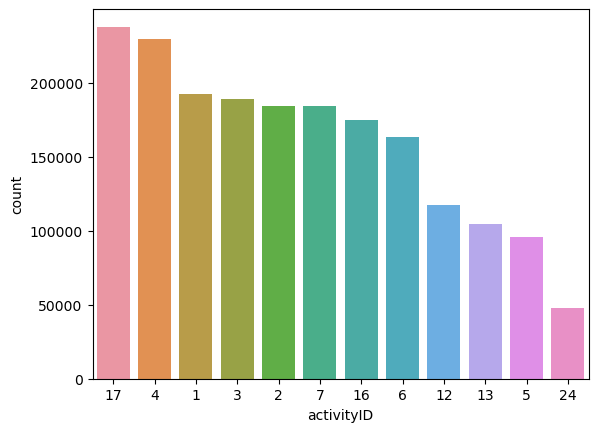

In [9]:
sns.countplot(x = "activityID", data = data, order = data.activityID.value_counts().index)

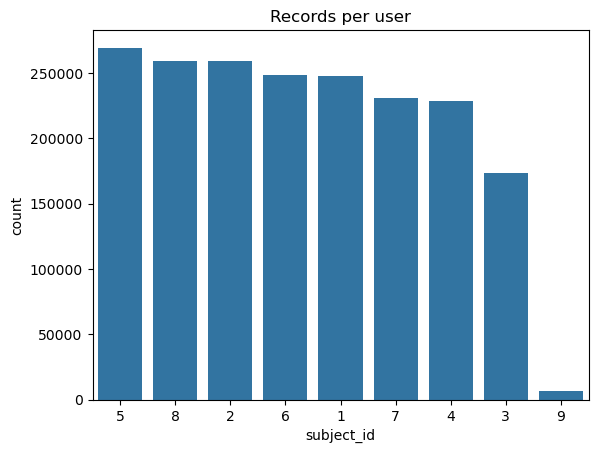

In [10]:
sns.countplot(x = "subject_id", data = data, palette = [sns.color_palette()[0]],
              order = data.subject_id.value_counts().index)
plt.title("Records per user");

In [5]:
data

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subject_id
2928,37.66,1,109.87238,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.863600,-58.369600,1
2929,37.67,1,109.87238,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,...,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.319700,-58.365600,1
2930,37.68,1,109.87238,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.784200,-58.611900,1
2931,37.69,1,109.87238,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,...,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.102800,-57.879900,1
2932,37.70,1,100.00000,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,...,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.122500,-57.884700,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872015,95.06,24,109.87238,25.125,4.99466,6.01881,5.59830,4.90787,6.05780,5.68357,...,9.41274,-2.26922,-1.759580,0.021288,-0.012885,0.005878,-45.7855,-0.831734,-0.170139,9
2872016,95.07,24,109.87238,25.125,5.02764,5.90369,5.48372,4.89090,5.95209,5.56301,...,9.33733,-2.23908,-1.834950,0.010715,0.003629,-0.004235,-46.0331,-0.817288,0.538134,9
2872017,95.08,24,109.87238,25.125,5.06409,5.71370,5.48491,4.97981,5.87584,5.45738,...,9.32243,-2.23905,-1.804610,-0.016939,-0.035176,-0.002309,-45.5140,-1.229410,0.540438,9
2872018,95.09,24,162.00000,25.125,5.13914,5.63724,5.48629,4.97690,5.69448,5.29167,...,9.38220,-2.26938,-1.880500,-0.028069,-0.036457,-0.007076,-45.9093,-0.565555,0.680109,9


In [6]:
IMU = ['hand', 'chest','ankle']
sensors = ['Temperature',
          'Acc16_1','Acc16_2','Acc16_3','Acc6_1','Acc6_2','Acc6_3',
          'Gyro1','Gyro2','Gyro3',
          'Magne1','Magne2','Magne3']

In [7]:
columns = list()
for name in IMU:
    for sensor in sensors:
        column  = name + sensor
        columns.append(column)
columns

['handTemperature',
 'handAcc16_1',
 'handAcc16_2',
 'handAcc16_3',
 'handAcc6_1',
 'handAcc6_2',
 'handAcc6_3',
 'handGyro1',
 'handGyro2',
 'handGyro3',
 'handMagne1',
 'handMagne2',
 'handMagne3',
 'chestTemperature',
 'chestAcc16_1',
 'chestAcc16_2',
 'chestAcc16_3',
 'chestAcc6_1',
 'chestAcc6_2',
 'chestAcc6_3',
 'chestGyro1',
 'chestGyro2',
 'chestGyro3',
 'chestMagne1',
 'chestMagne2',
 'chestMagne3',
 'ankleTemperature',
 'ankleAcc16_1',
 'ankleAcc16_2',
 'ankleAcc16_3',
 'ankleAcc6_1',
 'ankleAcc6_2',
 'ankleAcc6_3',
 'ankleGyro1',
 'ankleGyro2',
 'ankleGyro3',
 'ankleMagne1',
 'ankleMagne2',
 'ankleMagne3']

In [8]:
TIME_PERIODS = 128
# The steps to take from one segment to the next; if this value is equal to TIME_PERIODS, then there is
# no overlap between the segments
STEP_DISTANCE = 64
label_name = 'activityID'

In [44]:
for column in columns:
        data[column] = (data[column] - np.mean(data[column])) / np.std(data[column])
data.head()

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subject_id
2928,37.66,1,109.87238,-1.332554,1.147142,0.683185,0.498551,1.140404,0.758057,0.500046,...,0.045467,-0.237808,0.704955,-0.004614,0.009916,0.000113,-1.609176,-1.764083,-3.828141,1
2929,37.67,1,109.87238,-1.332554,1.159444,0.595023,0.538251,1.144708,0.696009,0.504093,...,0.038007,-0.235694,0.700636,0.011415,0.055166,0.002249,-1.597396,-1.738996,-3.827938,1
2930,37.68,1,109.87238,-1.332554,1.159274,0.517883,0.558147,1.144055,0.622510,0.504364,...,0.040564,-0.233558,0.731214,-0.038770,-0.029096,-0.003217,-1.567421,-1.714297,-3.840408,1
2931,37.69,1,109.87238,-1.332554,1.147575,0.518065,0.577318,1.136377,0.560557,0.527571,...,0.038048,-0.239917,0.718158,-0.036203,0.023921,0.012761,-1.590485,-1.775115,-3.803348,1
2932,37.70,1,100.00000,-1.332554,1.160904,0.534776,0.626152,1.134040,0.558286,0.546725,...,0.047972,-0.235685,0.713665,-0.006002,-0.023501,-0.003943,-1.559983,-1.776024,-3.803591,1


In [19]:
data_test = data[data["subject_id"] >= 7]
data_train = data[data["subject_id"] < 7]

<Axes: xlabel='activityID', ylabel='count'>

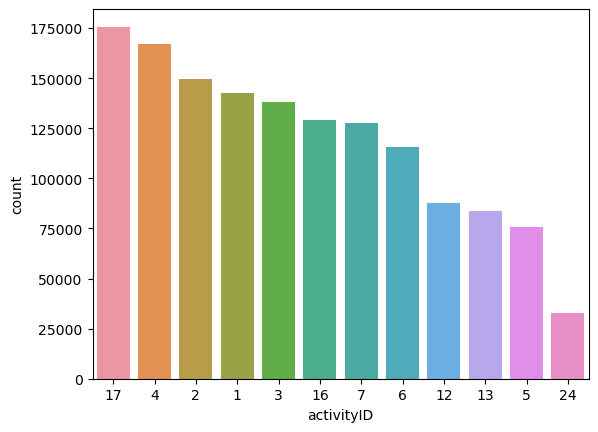

In [20]:
sns.countplot(x = "activityID", data = data_train, order = data_train.activityID.value_counts().index)

<Axes: xlabel='activityID', ylabel='count'>

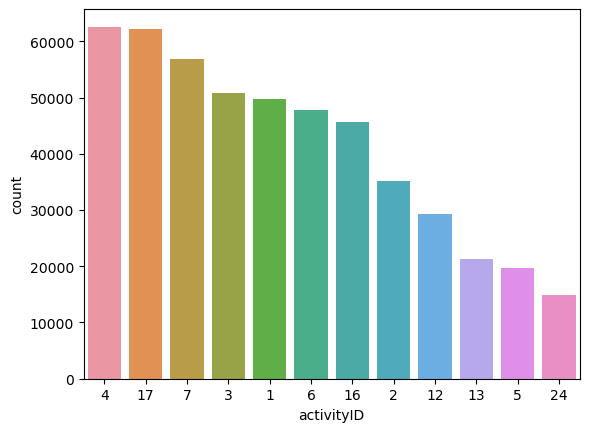

In [21]:
sns.countplot(x = "activityID", data = data_test, order = data_test.activityID.value_counts().index)

In [22]:
data_test.shape, data_train.shape

((495978, 43), (1425453, 43))

In [23]:
TIME_PERIODS = 128
STEP_DISTANCE = 64
LABEL = 'activityID'

In [24]:
def create_segments_and_labels(data, time_steps, step, label_name, columns):
    pd.options.mode.chained_assignment = None  # default='warn'
    columns = columns
    # make segments
    segments = []
    labels = []
    for i in range(0, len(data) - time_steps, step):
        segment = []
        for column in columns:
            segment.append(data[column].values[i: i + time_steps])
        segments.append(segment)
        label = stats.mode(data[label_name][i: i + time_steps])[0][0]
        labels.append(label)
    segments = np.asarray(segments, dtype= np.float32)
    reshaped_segments = np.transpose(segments, (0, 2, 1))
    print('reshaped_segments shape : ', reshaped_segments.shape)
    labels = np.asarray(labels)
    print('labels shape :', labels.shape)
    
    return reshaped_segments, labels

X_train, y_train = create_segments_and_labels(data_train, TIME_PERIODS, STEP_DISTANCE, LABEL, columns)
X_test, y_test = create_segments_and_labels(data_test, TIME_PERIODS, STEP_DISTANCE, LABEL, columns)

C:\Users\procns\AppData\Local\Temp\ipykernel_7724\2451767905.py:12: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(data[label_name][i: i + time_steps])[0][0]


reshaped_segments shape :  (22271, 128, 39)
labels shape : (22271,)
reshaped_segments shape :  (7748, 128, 39)
labels shape : (7748,)


In [38]:
X_train = X_train.astype("float32")
y_train = y_train.astype("float32")
X_test = X_test.astype("float32")
y_test = y_test.astype("float32")

In [25]:
y_train =  y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown = "ignore", sparse = False)
enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

print(X_train.shape, y_train.shape)

(22271, 128, 39) (22271, 12)


C:\Users\procns\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [27]:
#Epoch 500

verbose,epochs,batch_size=1,10,32 
n_timesteps,n_features,n_outputs=X_train.shape[1],X_train.shape[2],y_train.shape[1]

In [28]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))

In [29]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [45]:
history = model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,verbose=verbose)
model.summary()

Epoch 1/10
696/696 [==============================] - 11s 16ms/step - loss: 0.0566 - accuracy: 0.9841
Epoch 2/10
696/696 [==============================] - 11s 16ms/step - loss: 0.0517 - accuracy: 0.9862
Epoch 3/10
696/696 [==============================] - 11s 16ms/step - loss: 0.0412 - accuracy: 0.9875
Epoch 4/10
696/696 [==============================] - 12s 17ms/step - loss: 0.0439 - accuracy: 0.9886
Epoch 5/10
696/696 [==============================] - 13s 19ms/step - loss: 0.0357 - accuracy: 0.9891
Epoch 6/10
696/696 [==============================] - 12s 18ms/step - loss: 0.0348 - accuracy: 0.9905
Epoch 7/10
696/696 [==============================] - 13s 18ms/step - loss: 0.0512 - accuracy: 0.9879
Epoch 8/10
696/696 [==============================] - 13s 19ms/step - loss: 0.0410 - accuracy: 0.9889
Epoch 9/10
696/696 [==============================] - 14s 20ms/step - loss: 0.0321 - accuracy: 0.9916
Epoch 10/10
696/696 [==============================] - 14s 20ms/step - loss: 0.043

In [31]:
base_loss,base_accuracy=model.evaluate(X_test,y_test,batch_size=batch_size,verbose=1)

#cnn_file='CNN_Model.h5'
#tf.keras.models.save_model(model, cnn_file, include_optimizer=False)
#print('model saved at ', cnn_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

243/243 [==============================] - 1s 4ms/step - loss: 2.2063 - accuracy: 0.6351
Accuracy >63.513166
Base Loss >2.21


# 함수 사용하여 구현

In [32]:
def load_dataset(prefix = ''):
    TIME_PERIODS = 128
    STEP_DISTANCE = 64
    LABEL = 'activityID'
    IMU = ['hand', 'chest','ankle']
    sensors = ['Temperature',
          'Acc16_1','Acc16_2','Acc16_3','Acc6_1','Acc6_2','Acc6_3',
          'Gyro1','Gyro2','Gyro3',
          'Magne1','Magne2','Magne3']
     #columns
    columns = list()
    for name in IMU:
        for sensor in sensors:
            column  = name + sensor
            columns.append(column)
            
            
    data = pd.read_csv(path)
    data['heartrate'] = data['heartrate'].fillna(data['heartrate'].mean())
    data = data.dropna()
    data = data.drop(['Unnamed: 0',
                      'handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4',
                      'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4',
                      'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4'],
                       axis = 1)  # removal of orientation columns as the

    data = data.drop(data[data.activityID == 0].index)
    data = scaler(data, columns)
    
    data_test = data[data["subject_id"] >= 7]
    data_train = data[data["subject_id"] < 7]
    
    #columns
    columns = list()
   
    for name in IMU:
        for sensor in sensors:
            column  = name + sensor
            columns.append(column)
    X_train, y_train = create_segments_and_labels(data_train, TIME_PERIODS, STEP_DISTANCE, LABEL,columns )
    X_test, y_test = create_segments_and_labels(data_test, TIME_PERIODS, STEP_DISTANCE, LABEL, columns)
    
    y_train, y_test  = onehotencoding_data(y_train, y_test)
    print("X_train.shape :", X_train.shape)
    print("y_train.shape :", y_train.shape)
    print("X_test.shape:", X_test.shape) 
    print("y_test.shape:", y_test.shape)
    return X_train, y_train, X_test, y_test
    #make segments

In [33]:
def create_segments_and_labels(data, time_steps, step, label_name, columns):
    pd.options.mode.chained_assignment = None  # default='warn'
    columns = columns
    # make segments
    segments = []
    labels = []
    for i in range(0, len(data) - time_steps, step):
        segment = []
        for column in columns:
            segment.append(data[column].values[i: i + time_steps])
        segments.append(segment)
        label = stats.mode(data[label_name][i: i + time_steps])[0][0]
        labels.append(label)
        
    segments = np.asarray(segments, dtype= np.float32)
    reshaped_segments = np.transpose(segments, (0, 2, 1))
    print('reshaped_segments shape : ', reshaped_segments.shape)
    labels = np.asarray(labels)
    print('labels shape :', labels.shape)
    
    return reshaped_segments, labels

In [46]:
def scaler(data, columns):
    for column in columns:
        (data[column] - np.mean(data[column])) / np.std(data[column])
    return data

In [35]:
def onehotencoding_data(train, test):
    train =  train.reshape(-1,1)
    test = test.reshape(-1,1)
    enc = OneHotEncoder(handle_unknown = "ignore", sparse = False)
    enc = enc.fit(train)

    train = enc.transform(train)
    test = enc.transform(test)
    return train, test

In [36]:
# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy):
 verbose, epochs, batch_size = 0, 20, 32
 n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
 model = Sequential()
 model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
 model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
 model.add(Dropout(0.5))
 model.add(MaxPooling1D(pool_size=2))
 model.add(Flatten())
 model.add(Dense(100, activation='relu'))
 model.add(Dense(n_outputs, activation='softmax'))
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 # fit network
 model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
 # evaluate model
 _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
 return accuracy

In [37]:
# summarize scores
def summarize_results(scores):
    print(scores)
    m, s = mean(scores), std(scores)
    print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

In [38]:
# run an experiment
def run_experiment(repeats=10):
    # load data
    trainX, trainy, testX, testy = load_dataset()
    # repeat experiment
    scores = list()
    for r in range(repeats):
        score = evaluate_model(trainX, trainy, testX, testy)
        score = score * 100.0
        print('>#%d: %.3f' % (r+1, score))
        scores.append(score)
    # summarize results
    summarize_results(scores)

In [39]:
run_experiment()

C:\Users\procns\AppData\Local\Temp\ipykernel_7724\3621205788.py:12: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(data[label_name][i: i + time_steps])[0][0]


reshaped_segments shape :  (22271, 128, 39)
labels shape : (22271,)
reshaped_segments shape :  (7748, 128, 39)
labels shape : (7748,)
X_train.shape : (22271, 128, 39)
y_train.shape : (22271, 12)
X_test.shape: (7748, 128, 39)
y_test.shape: (7748, 12)


C:\Users\procns\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


>#1: 63.823
>#2: 63.991
>#3: 60.777
>#4: 52.981
>#5: 55.085
>#6: 60.119
>#7: 65.501
>#8: 63.513
>#9: 60.067
>#10: 61.280
[63.82291913032532, 63.99070620536804, 60.77697277069092, 52.981412410736084, 55.085182189941406, 60.11874079704285, 65.50077199935913, 63.51316571235657, 60.0671112537384, 61.280328035354614]


NameError: name 'mean' is not defined